EDA for Modified FloatingDP data

In [ ]:
# Install fastai to easily download and extract data
!pip install -U fastai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42

In [ ]:
# Import necessary modules from fastai
from fastai.data.external import untar_data
from pathlib import Path

# URL of the provided dataset
url = "https://marinedebrisdetector.s3.eu-central-1.amazonaws.com/data/refinedfloatingobjects.zip"

# Download and unzip dataset (to default location)
path = untar_data(url)

# Print path to verify data storage location
print(f'Data extracted to: {path}')


Data extracted to: /root/.fastai/data/refinedfloatingobjects


In [ ]:
# Verify contents of data directory
print(path.ls())

[Path('/root/.fastai/data/refinedfloatingobjects/marmara_20210519.prj'), Path('/root/.fastai/data/refinedfloatingobjects/venice_20180630_qualitative_bbox.shx'), Path('/root/.fastai/data/refinedfloatingobjects/accra_20181031_qualitative_point.shx'), Path('/root/.fastai/data/refinedfloatingobjects/venice_20180630.dbf'), Path('/root/.fastai/data/refinedfloatingobjects/neworleans_20200202_qualitative_bbox.fix'), Path('/root/.fastai/data/refinedfloatingobjects/marmara_20210519.tif'), Path('/root/.fastai/data/refinedfloatingobjects/durban_20190424.fix'), Path('/root/.fastai/data/refinedfloatingobjects/neworleans_20200202.tif'), Path('/root/.fastai/data/refinedfloatingobjects/venice_20180630_qualitative_bbox.fix'), Path('/root/.fastai/data/refinedfloatingobjects/neworleans_20200202.shx'), Path('/root/.fastai/data/refinedfloatingobjects/accra_20181031_qualitative_poly.fix'), Path('/root/.fastai/data/refinedfloatingobjects/marmara_20210519.dbf'), Path('/root/.fastai/data/refinedfloatingobjects/

In [ ]:
from pathlib import Path

# Set the path where data was downloaded
path = Path('/root/.fastai/data/refinedfloatingobjects')

# Check and list contents of the extracted dataset directory
print('Dataset main directory contents:')
print(list(path.ls()))

# If there are subdirectories (e.g., images, annotations), check their contents clearly
for subdir in path.ls():
    if subdir.is_dir():
        print(f'\nContents of "{subdir.name}" directory:')
        print(subdir.ls())


Dataset main directory contents:
[Path('/root/.fastai/data/refinedfloatingobjects/marmara_20210519.prj'), Path('/root/.fastai/data/refinedfloatingobjects/venice_20180630_qualitative_bbox.shx'), Path('/root/.fastai/data/refinedfloatingobjects/accra_20181031_qualitative_point.shx'), Path('/root/.fastai/data/refinedfloatingobjects/venice_20180630.dbf'), Path('/root/.fastai/data/refinedfloatingobjects/neworleans_20200202_qualitative_bbox.fix'), Path('/root/.fastai/data/refinedfloatingobjects/marmara_20210519.tif'), Path('/root/.fastai/data/refinedfloatingobjects/durban_20190424.fix'), Path('/root/.fastai/data/refinedfloatingobjects/neworleans_20200202.tif'), Path('/root/.fastai/data/refinedfloatingobjects/venice_20180630_qualitative_bbox.fix'), Path('/root/.fastai/data/refinedfloatingobjects/neworleans_20200202.shx'), Path('/root/.fastai/data/refinedfloatingobjects/accra_20181031_qualitative_poly.fix'), Path('/root/.fastai/data/refinedfloatingobjects/marmara_20210519.dbf'), Path('/root/.fa

In [ ]:
# Install GeoPandas to handle shapefiles and geospatial data
!pip install geopandas

First few rows of annotation data:
                                                                                                                                                     geometry
0                                                         POLYGON ((-0.16737 5.54702, -0.16736 5.5469, -0.16749 5.54685, -0.16749 5.54702, -0.16737 5.54702))
1                                                          POLYGON ((-0.1668 5.54807, -0.16681 5.54793, -0.16692 5.54793, -0.16691 5.54805, -0.1668 5.54807))
2  POLYGON ((-0.16686 5.54864, -0.16706 5.54858, -0.16717 5.54846, -0.16727 5.54853, -0.16722 5.54865, -0.16713 5.54873, -0.16687 5.54877, -0.16686 5.54864))
3                                      POLYGON ((-0.16695 5.54928, -0.16689 5.54942, -0.16674 5.54944, -0.16669 5.54935, -0.16679 5.54927, -0.16695 5.54928))
4                       POLYGON ((-0.16656 5.54883, -0.16657 5.54901, -0.1664 5.5491, -0.16627 5.5491, -0.16628 5.54899, -0.16638 5.54886, -0.16656 5.54883))

Columns availabl

<Axes: >

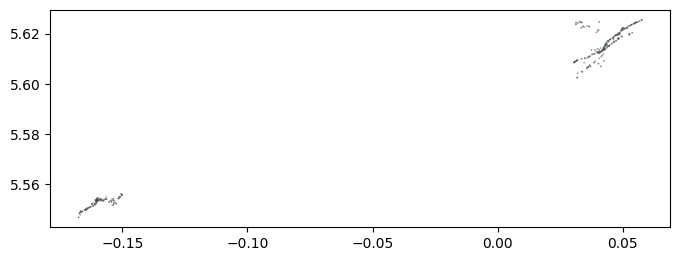

In [ ]:
import geopandas as gpd
from pathlib import Path

# Define the dataset path clearly
path = Path('/root/.fastai/data/refinedfloatingobjects')

# Choose an example shapefile to inspect clearly (e.g., accra_20181031_qualitative_poly.shp)
shapefile_path = path / 'accra_20181031_qualitative_poly.shp'

# Load shapefile into a GeoDataFrame using GeoPandas
gdf = gpd.read_file(shapefile_path)

# Display the first few rows to clearly inspect annotations
print("First few rows of annotation data:")
print(gdf.head())

# Display column names to understand what annotation data is available
print("\nColumns available in annotations:")
print(gdf.columns)

# Quick plot to visualize clearly the annotation polygons
gdf.plot(figsize=(8,8), alpha=0.5, edgecolor='k')


In [ ]:
import geopandas as gpd
from pathlib import Path

# Define path again clearly
path = Path('/root/.fastai/data/refinedfloatingobjects')

# Now explicitly load shapefile along with metadata (.dbf file) using GeoPandas again
shapefile_path = path / 'accra_20181031_qualitative_poly.shp'

# Load shapefile into GeoDataFrame
gdf = gpd.read_file(shapefile_path)

# Check again for all columns and metadata explicitly
print("Detailed Annotation Data (first 10 rows):")
print(gdf.head(10))

# Check explicitly for more metadata columns
print("\nAll available columns clearly identified:")
print(gdf.columns.tolist())


Detailed Annotation Data (first 10 rows):
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     geometry
0                                                                                                                                                                                                                                                                                                                                                                                                         POLYGON ((-0.16737 5.54702, -0.16736 5.5469, -0.16749 5.54685, -0.1674

In [ ]:
# Check another shapefile clearly (e.g., 'neworleans_20200202_qualitative_bbox.shp')
import geopandas as gpd

shapefile_new = path / 'neworleans_20200202_qualitative_bbox.shp'

# Load clearly and check columns
gdf_new = gpd.read_file(shapefile_new)

# Display clearly
print("New Orleans annotations (first few rows):")
print(gdf_new.head())

print("\nColumns in the new shapefile:")
print(gdf_new.columns.tolist())


New Orleans annotations (first few rows):
                                                                                                         geometry
0  POLYGON ((-88.92847 30.26974, -88.92847 30.29983, -88.88822 30.29983, -88.88822 30.26974, -88.92847 30.26974))
1  POLYGON ((-88.10536 30.20505, -88.10536 30.23694, -88.06236 30.23694, -88.06236 30.20505, -88.10536 30.20505))

Columns in the new shapefile:
['geometry']


In [ ]:
# Install rasterio (for GeoTIFF images) and contextily for better map visualization
!pip install rasterio contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 20.2 MB/s eta 0:00:00


Image CRS: EPSG:32630
Polygon original CRS: EPSG:4326


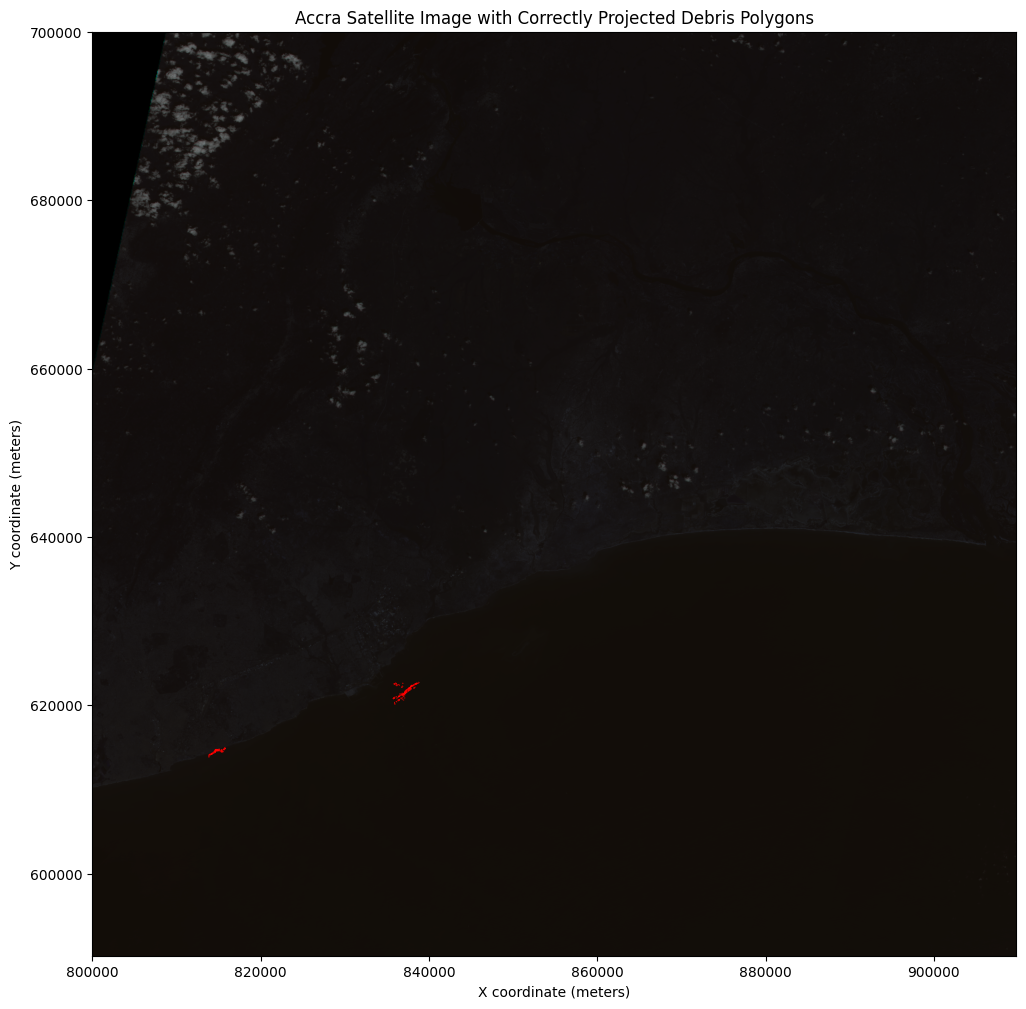

In [ ]:
import geopandas as gpd
import rasterio
import rasterio.plot
import matplotlib.pyplot as plt
from pathlib import Path

# Define paths clearly
path = Path('/root/.fastai/data/refinedfloatingobjects')

shapefile_path = path / 'accra_20181031_qualitative_poly.shp'
image_path = path / 'accra_20181031.tif'

# Load polygons again
gdf = gpd.read_file(shapefile_path)

# Load the satellite image clearly and get CRS
with rasterio.open(image_path) as src:
    img = src.read([1, 2, 3])  # RGB
    img_crs = src.crs  # get image CRS explicitly
    extent = rasterio.plot.plotting_extent(src)

# Print CRS clearly for verification
print(f"Image CRS: {img_crs}")
print(f"Polygon original CRS: {gdf.crs}")

# Reproject polygons explicitly to match image CRS
gdf_projected = gdf.to_crs(img_crs)

# Plot image and reprojected polygons explicitly
fig, ax = plt.subplots(figsize=(12, 12))

# Plot satellite image clearly (normalized)
img_norm = (img - img.min()) / (img.max() - img.min())  # Normalize image explicitly
rasterio.plot.show(img_norm, extent=extent, ax=ax)

# Overlay reprojected polygons explicitly
gdf_projected.boundary.plot(ax=ax, edgecolor='red', linewidth=1)

# Titles and labels clearly set
ax.set_title('Accra Satellite Image with Correctly Projected Debris Polygons')
ax.set_xlabel('X coordinate (meters)')
ax.set_ylabel('Y coordinate (meters)')

plt.show()


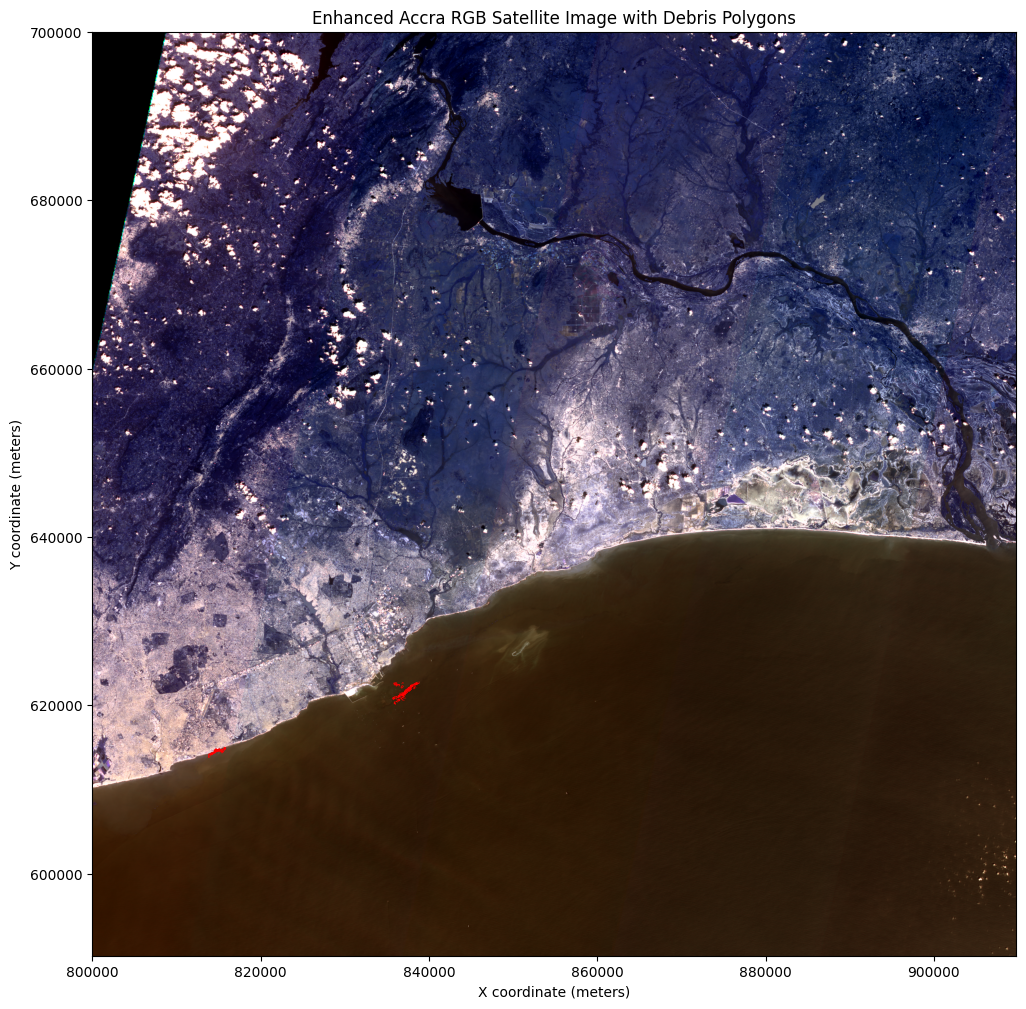

In [ ]:
import geopandas as gpd
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Define paths again explicitly
path = Path('/root/.fastai/data/refinedfloatingobjects')
shapefile_path = path / 'accra_20181031_qualitative_poly.shp'
image_path = path / 'accra_20181031.tif'

# Load polygons clearly
gdf = gpd.read_file(shapefile_path)

# Load and clearly enhance satellite image with histogram stretching
with rasterio.open(image_path) as src:
    img = src.read([1, 2, 3])  # RGB channels explicitly
    extent = rasterio.plot.plotting_extent(src)
    img_crs = src.crs

    # Histogram stretching for better visualization explicitly
    def stretch(band):
        band_min, band_max = np.percentile(band, (2, 98))
        return np.clip((band - band_min) / (band_max - band_min), 0, 1)

    # Apply stretching explicitly to each band
    img_stretched = np.stack([stretch(img[i]) for i in range(img.shape[0])])

# Reproject polygons explicitly
gdf_projected = gdf.to_crs(img_crs)

# Clearly plot enhanced image and polygons
fig, ax = plt.subplots(figsize=(12, 12))

# Enhanced RGB image visualization explicitly
show(img_stretched, extent=extent, ax=ax)

# Clearly overlay polygons
gdf_projected.boundary.plot(ax=ax, edgecolor='red', linewidth=1.5)

# Title and labels explicitly
ax.set_title('Enhanced Accra RGB Satellite Image with Debris Polygons')
ax.set_xlabel('X coordinate (meters)')
ax.set_ylabel('Y coordinate (meters)')

plt.show()

In [ ]:
import rasterio
from pathlib import Path

# Define the dataset path explicitly
dataset_path = Path('/root/.fastai/data/refinedfloatingobjects')

# Get a list of all '.tif' files clearly
tif_files = list(dataset_path.glob('*.tif'))

# Print clearly the total number of satellite images
print(f'Total number of satellite images: {len(tif_files)}')

# Check each image clearly for number of bands
for tif_file in tif_files:
    with rasterio.open(tif_file) as src:
        num_bands = src.count
        print(f'{tif_file.name}: {num_bands} bands')


Total number of satellite images: 8
marmara_20210519.tif: 13 bands
neworleans_20200202.tif: 13 bands
accra_20181031.tif: 13 bands
accra_20181031_qualitative_poly.tif: 1 bands
durban_20190424.tif: 12 bands
durban_20190424_qualitative_poly.tif: 1 bands
lagos_20190101.tif: 12 bands
venice_20180630.tif: 12 bands


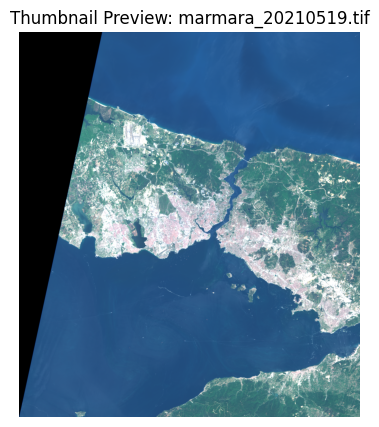

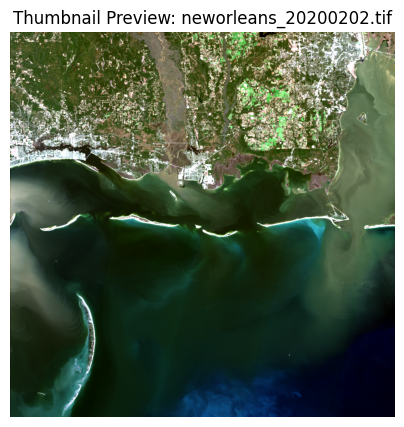

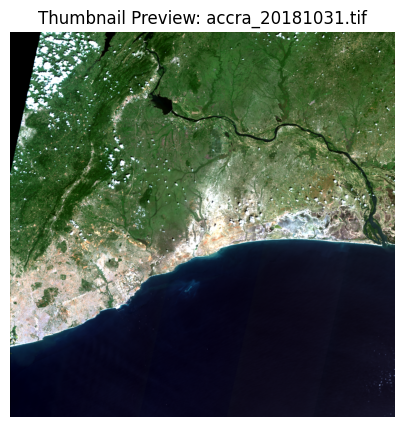

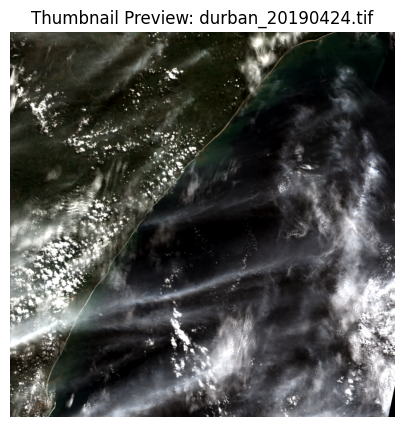

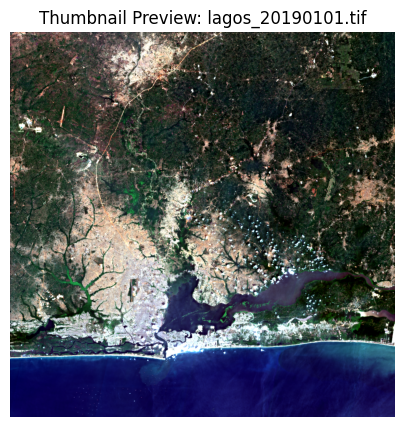

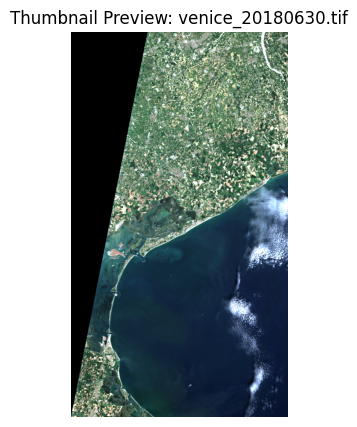

In [ ]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Explicit dataset path
dataset_path = Path('/root/.fastai/data/refinedfloatingobjects')

# Select main multispectral images explicitly
tif_files = [
    f for f in dataset_path.glob('*.tif')
    if 'qualitative' not in f.name
]

# Sentinel-2 RGB bands explicitly (4,3,2)
RGB_bands = [4, 3, 2]

# Define thumbnail size explicitly (e.g., scale down significantly)
thumbnail_scale = 0.1  # 10% size for low RAM usage

for tif_file in tif_files:
    with rasterio.open(tif_file) as src:
        # Explicit thumbnail calculation
        width = int(src.width * thumbnail_scale)
        height = int(src.height * thumbnail_scale)

        # Read RGB bands explicitly as a thumbnail
        img = src.read(
            RGB_bands,
            out_shape=(3, height, width),
            resampling=rasterio.enums.Resampling.bilinear
        )

        # Simple stretching for clarity explicitly
        def stretch(band):
            band_min, band_max = np.percentile(band, (2, 98))
            return np.clip((band - band_min) / (band_max - band_min), 0, 1)

        img_stretched = np.stack([stretch(img[i]) for i in range(3)])

        # Plot clearly (low-res thumbnail)
        plt.figure(figsize=(5, 5))
        plt.title(f'Thumbnail Preview: {tif_file.name}')
        plt.imshow(np.transpose(img_stretched, (1, 2, 0)))
        plt.axis('off')
        plt.show()


                           Location  Annotation Count
0                    accra_20181031               120
1                    accra_20181031                 2
2                   durban_20190424                 4
3                   durban_20190424               200
4                   venice_20180630                 2
5                  marmara_20210519                 2
6  accra_20181031_qualitative_point                 1
7               neworleans_20200202                 2
8                    lagos_20190101                 2


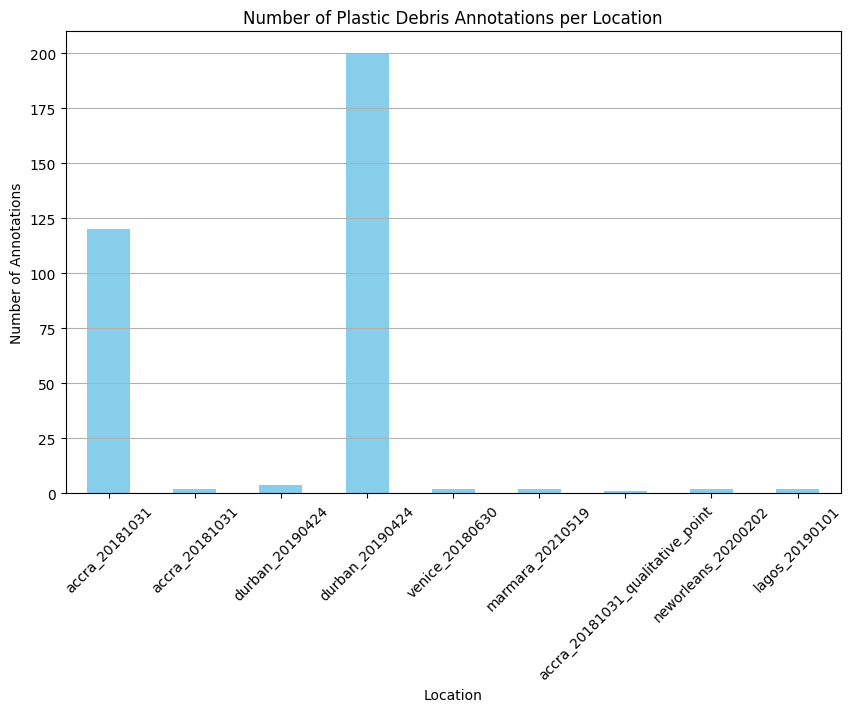

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path

# Define your dataset path  (for clarity in a single notebook session)
dataset_path = Path('/root/.fastai/data/refinedfloatingobjects')

# Select only annotation shapefiles  (those containing 'qualitative')
shapefiles = list(dataset_path.glob('*qualitative*.shp'))

# Empty list clearly defined for annotation counts
annotation_counts = []

# Explicitly loop through shapefiles to count debris annotations (polygons)
for shp in shapefiles:
    gdf = gpd.read_file(shp)
    location_name = shp.stem.replace('_qualitative_poly', '').replace('_qualitative_bbox', '')
    count = len(gdf)
    annotation_counts.append({'Location': location_name, 'Annotation Count': count})

# Clearly convert counts to pandas DataFrame
df_annotations = pd.DataFrame(annotation_counts)

# Print explicitly the counts DataFrame
print(df_annotations)

# Plot clearly the number of annotations per location as a bar chart
df_annotations.plot.bar(x='Location', y='Annotation Count', figsize=(10,6), legend=False, color='skyblue')
plt.title('Number of Plastic Debris Annotations per Location')
plt.xlabel('Location')
plt.ylabel('Number of Annotations')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### 🔍 EDA Analysis: Distribution of Plastic Debris Annotations

The Exploratory Data Analysis reveals a significant variation in the number of plastic debris annotations across different geographic locations:

Durban (2019-04-24) shows the highest number of annotations (200), suggesting a substantial presence of plastic debris.

Accra (2018-10-31) also has a high count (120) of annotations, indicating another major hotspot for floating plastic debris.

The remaining locations (Venice, Marmara Sea, New Orleans, Lagos) have very few annotations (between 1 and 4), reflecting a relatively lower concentration of annotated plastic debris in these areas.

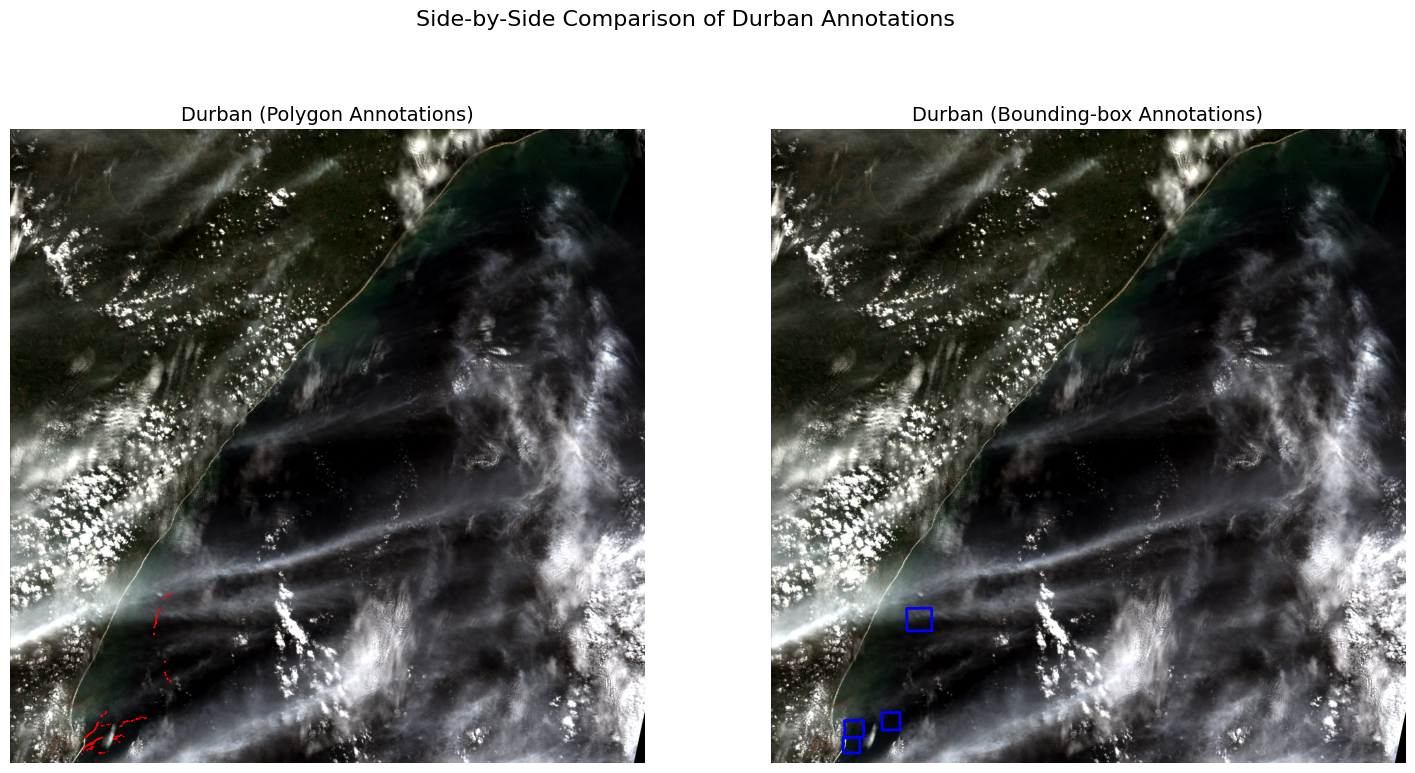

In [ ]:
# Import required libraries
import rasterio
from rasterio.plot import show
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Define paths
dataset_path = Path('/root/.fastai/data/refinedfloatingobjects')

# Paths to the Durban satellite image and annotation shapefiles
image_path = dataset_path / 'durban_20190424.tif'
poly_shapefile_path = dataset_path / 'durban_20190424_qualitative_poly.shp'
bbox_shapefile_path = dataset_path / 'durban_20190424_qualitative_bbox.shp'

# Load satellite image (RGB bands: 4,3,2 )
with rasterio.open(image_path) as src:
    img = src.read([4, 3, 2], out_shape=(3, int(src.height * 0.2), int(src.width * 0.2)),
                   resampling=rasterio.enums.Resampling.bilinear)
    img_crs = src.crs
    extent = rasterio.plot.plotting_extent(src)

    # Simple stretching for clear visualization
    def stretch(band):
        band_min, band_max = np.percentile(band, (2, 98))
        return np.clip((band - band_min) / (band_max - band_min), 0, 1)

    img_stretched = np.stack([stretch(img[i]) for i in range(3)])

# Load and reproject polygon annotations
gdf_poly = gpd.read_file(poly_shapefile_path).to_crs(img_crs)

# Load and  reproject bounding-box annotations
gdf_bbox = gpd.read_file(bbox_shapefile_path).to_crs(img_crs)

# Plot both annotation types side by side clearly
fig, axes = plt.subplots(1, 2, figsize=(18, 9))

# Plot Polygon annotations  (Left side)
axes[0].imshow(np.transpose(img_stretched, (1, 2, 0)), extent=extent)
gdf_poly.boundary.plot(ax=axes[0], edgecolor='red', linewidth=1)
axes[0].set_title('Durban (Polygon Annotations)', fontsize=14)
axes[0].axis('off')

# Plot Bounding-box annotations (Right side)
axes[1].imshow(np.transpose(img_stretched, (1, 2, 0)), extent=extent)
gdf_bbox.boundary.plot(ax=axes[1], edgecolor='blue', linewidth=2)
axes[1].set_title('Durban (Bounding-box Annotations)', fontsize=14)
axes[1].axis('off')

plt.suptitle('Side-by-Side Comparison of Durban Annotations', fontsize=16)
plt.show()

###The reason for duplicated location names (durban_20190424, accra_20181031) in your output is that there are two separate annotation shapefiles for the same location, but with different annotation types:

Polygon annotations (_qualitative_poly.shp):
Typically represent precise polygon boundaries explicitly outlining areas with debris.

Bounding-box annotations (_qualitative_bbox.shp):
Usually represent rectangular boxes around debris regions, less precise but simpler to use.

Example: Durban has two files:

durban_20190424_qualitative_poly.shp (with 200 annotations—many precise polygons)

durban_20190424_qualitative_bbox.shp (with 4 annotations—bounding boxes)

Similarly, Accra has both polygon (120 annotations) and bounding-box (2 annotations) files.

Summary Statistics for Durban Polygon Areas (in square meters):
count      200.000000
mean      1746.647410
std       2126.970215
min         83.428598
25%        504.395099
50%       1145.267598
75%       2026.222607
max      16261.979286
Name: area_sqm, dtype: float64


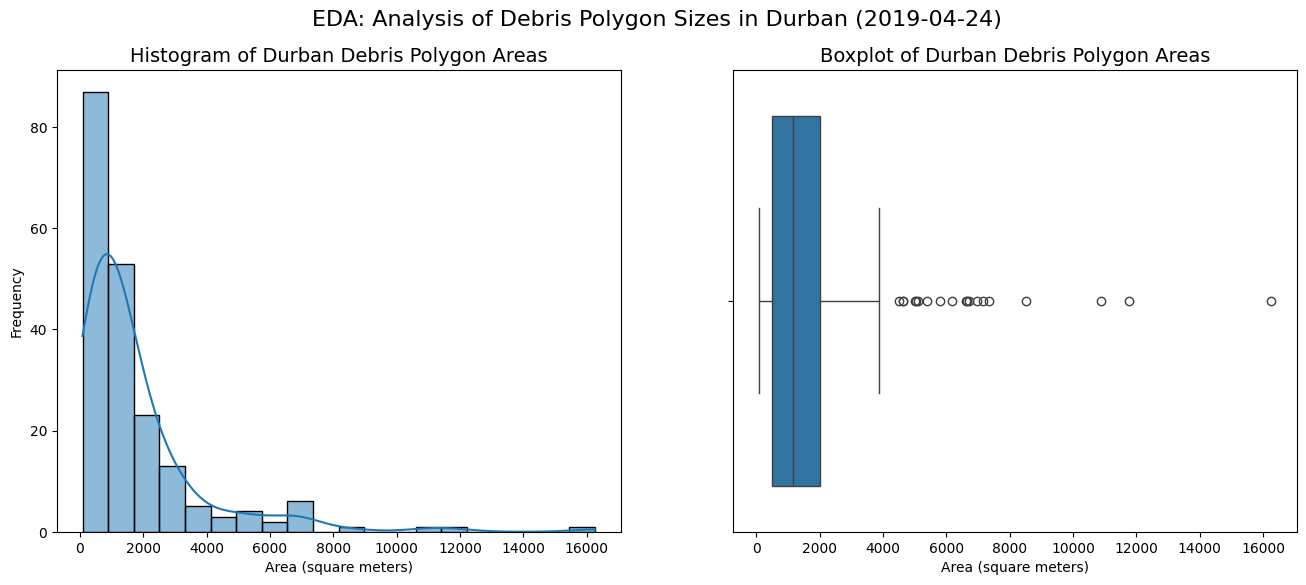

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate polygon areas  (in square meters)
gdf_poly['area_sqm'] = gdf_poly.geometry.area

# Print summary statistics
print("Summary Statistics for Durban Polygon Areas (in square meters):")
print(gdf_poly['area_sqm'].describe())

# Plot a histogram and boxplot  to visualize polygon areas clearly
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram (clear distribution of polygon areas)
sns.histplot(gdf_poly['area_sqm'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Durban Debris Polygon Areas', fontsize=14)
axes[0].set_xlabel('Area (square meters)')
axes[0].set_ylabel('Frequency')

# Boxplot (to detect outliers and median area)
sns.boxplot(x=gdf_poly['area_sqm'], ax=axes[1])
axes[1].set_title('Boxplot of Durban Debris Polygon Areas', fontsize=14)
axes[1].set_xlabel('Area (square meters)')

plt.suptitle('EDA: Analysis of Debris Polygon Sizes in Durban (2019-04-24)', fontsize=16)
plt.show()


###Most annotated debris regions are relatively small-to-medium-sized. Thus, a 128×128 pixel patch (at Sentinel-2’s 10m resolution, roughly covering 1,280×1,280 sqm = 1.28 km²) will comfortably include the vast majority of debris polygons.

The presence of outliers (very large polygons) suggests some patches might contain large debris fields. For these areas, the 128×128 px patch is adequate to represent local debris density but might capture only a part of extremely large debris clusters.

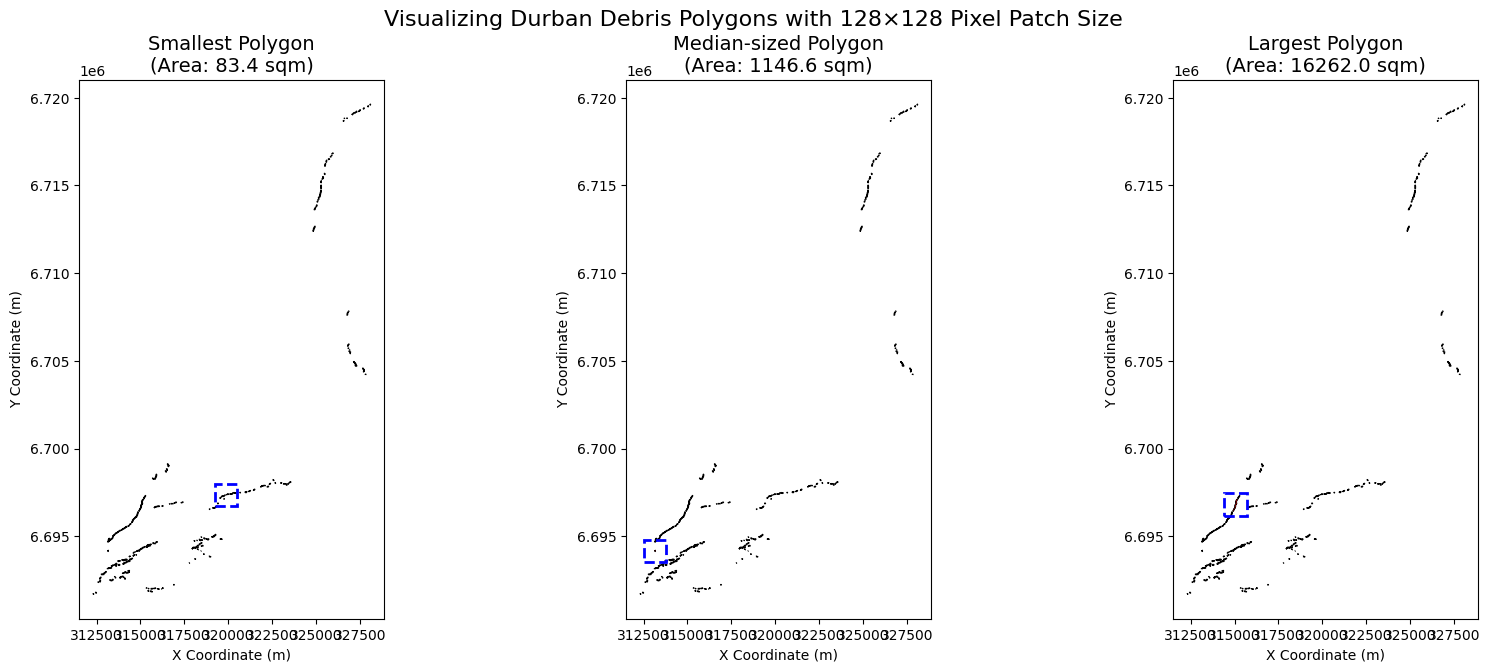

In [ ]:
# visualization of selected polygons with 128x128 pixel patch size
import random
import rasterio
import matplotlib.patches as patches

# Sentinel-2 resolution  (10m per pixel)
pixel_resolution = 10  # meters per pixel
patch_size_m = 128 * pixel_resolution  # patch size in meters  (1280m)

# Randomly select three polygons  (small, median-sized, large)
small_poly = gdf_poly.sort_values('area_sqm').iloc[0]
median_poly = gdf_poly.sort_values('area_sqm').iloc[len(gdf_poly)//2]
large_poly = gdf_poly.sort_values('area_sqm').iloc[-1]

selected_polys = [small_poly, median_poly, large_poly]
titles = ['Smallest Polygon', 'Median-sized Polygon', 'Largest Polygon']

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

for i, (poly, title) in enumerate(zip(selected_polys, titles)):
    minx, miny, maxx, maxy = poly.geometry.bounds
    centroid_x, centroid_y = poly.geometry.centroid.coords[0]

    axes[i].set_aspect('equal')
    gdf_poly.plot(ax=axes[i], color='lightgrey', edgecolor='black')
    gdf_poly[gdf_poly.index==poly.name].plot(ax=axes[i], color='red')

    # visualize the 128×128 px patch around centroid
    rect = patches.Rectangle((centroid_x - patch_size_m/2, centroid_y - patch_size_m/2),
                             patch_size_m, patch_size_m, linewidth=2,
                             edgecolor='blue', facecolor='none', linestyle='--')
    axes[i].add_patch(rect)

    axes[i].set_title(f"{title}\n(Area: {poly['area_sqm']:.1f} sqm)", fontsize=14)
    axes[i].set_xlabel('X Coordinate (m)')
    axes[i].set_ylabel('Y Coordinate (m)')

plt.suptitle("Visualizing Durban Debris Polygons with 128×128 Pixel Patch Size", fontsize=16)
plt.show()


Generating FDI map for Accra...


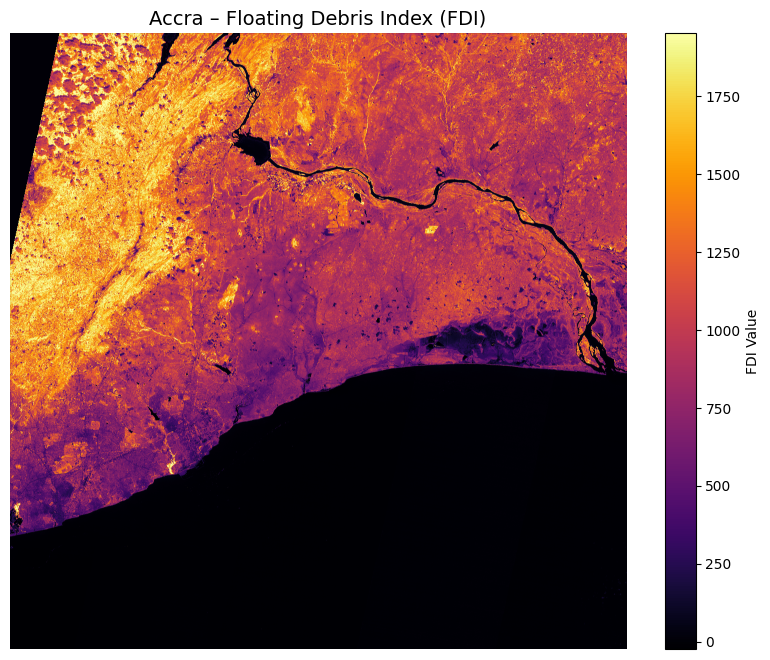

Generating FDI map for Durban...


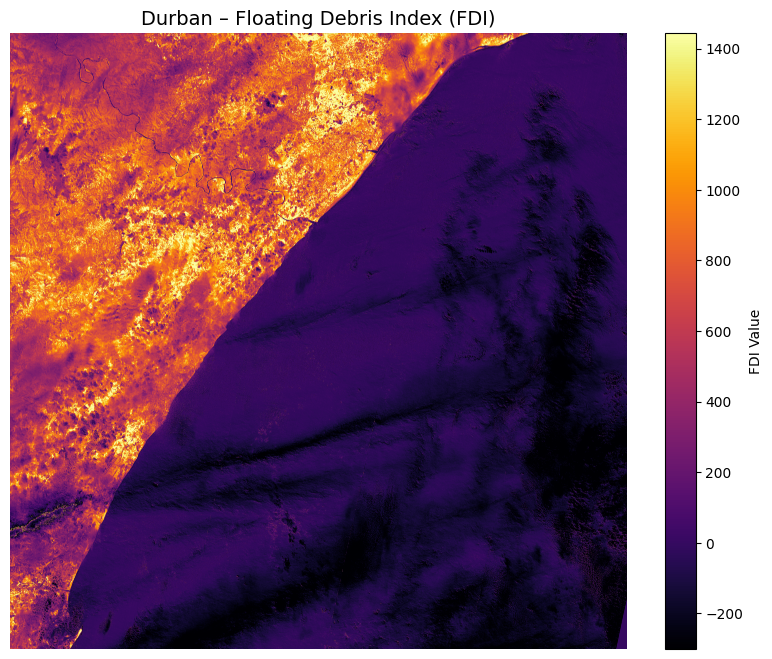

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
from pathlib import Path

# Paths
dataset_path = Path('/root/.fastai/data/refinedfloatingobjects')

# Sentinel-2 band mapping
band_indices = {
    'B4': 4,   # Red
    'B5': 5,   # Vegetation Red Edge
    'B6': 6,   # Red Edge 2
    'B8A': 8   # Narrow NIR (note: 8A is band 8 in file if B10 is excluded)
}

# Scenes to process
scenes = {
    "Accra": dataset_path / 'accra_20181031.tif',
    "Durban": dataset_path / 'durban_20190424.tif'
}

# FDI computation function
def compute_fdi(image_path):
    with rasterio.open(image_path) as src:
        # Read relevant bands (NOTE: bands are 1-indexed in rasterio)
        B4 = src.read(band_indices['B4'] + 1).astype('float32')
        B5 = src.read(band_indices['B5'] + 1).astype('float32')
        B6 = src.read(band_indices['B6'] + 1).astype('float32')
        B8A = src.read(band_indices['B8A'] + 1).astype('float32')

        # Compute FDI
        numerator = (B8A - B5)
        denominator = (B8A - B4) + 1e-6  # avoid division by zero
        correction = (numerator / denominator) * (B4 - B5)
        FDI = B6 - B5 - correction

        return FDI

# Plot with red-to-yellow palette
def plot_fdi(fdi_array, title):
    plt.figure(figsize=(10, 8))
    plt.imshow(fdi_array, cmap='inferno', vmin=np.percentile(fdi_array, 5), vmax=np.percentile(fdi_array, 99))
    plt.colorbar(label='FDI Value')
    plt.title(f'{title} – Floating Debris Index (FDI)', fontsize=14)
    plt.axis('off')
    plt.show()

# Generate and display FDI maps
for name, path in scenes.items():
    print(f"Generating FDI map for {name}...")
    fdi = compute_fdi(path)
    plot_fdi(fdi, name)


In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import plotting_extent
import geopandas as gpd
from pathlib import Path

# --- Define paths ---
dataset_path = Path('/root/.fastai/data/refinedfloatingobjects')
scene_name = 'durban_20190424'
image_path = dataset_path / f'{scene_name}.tif'
polygon_path = dataset_path / f'{scene_name}_qualitative_poly.shp'

# --- Load image and required bands ---
with rasterio.open(image_path) as src:
    crs = src.crs
    extent = plotting_extent(src)

    # Read RGB bands for land visualization
    B4 = src.read(4).astype('float32')  # Red
    B3 = src.read(3).astype('float32')  # Green
    B2 = src.read(2).astype('float32')  # Blue

    # Stretch RGB for better visualization
    def normalize(band):
        band_min, band_max = np.percentile(band, (2, 98))
        return np.clip((band - band_min) / (band_max - band_min), 0, 1)

    rgb = np.stack([normalize(B4), normalize(B3), normalize(B2)], axis=-1)

    # Load bands needed for FDI
    B5 = src.read(5).astype('float32')
    B6 = src.read(6).astype('float32')
    B8A = src.read(9).astype('float32')  # Band 8A is at index 9 if B10 is excluded

    # --- Compute FDI ---
    numerator = (B8A - B5)
    denominator = (B8A - B4) + 1e-6  # avoid divide by zero
    correction = (numerator / denominator) * (B4 - B5)
    FDI = B6 - B5 - correction

# --- Generate ocean mask ---
# Ocean typically has low NIR reflectance (B8A); threshold < 600 is ocean (tunable)
ocean_mask = B8A < 600

# Normalize FDI for overlay (only where ocean is present)
FDI_norm = np.zeros_like(FDI)
FDI_norm[ocean_mask] = np.clip((FDI[ocean_mask] - np.percentile(FDI[ocean_mask], 2)) /
                               (np.percentile(FDI[ocean_mask], 98) - np.percentile(FDI[ocean_mask], 2)), 0, 1)

# Create colormap overlay using inferno
from matplotlib import cm
fdi_color = cm.inferno(FDI_norm)[..., :3]  # discard alpha

# Combine RGB + FDI overlay using alpha blending where ocean is present
composite = rgb.copy()
alpha = 0.7  # opacity of FDI
composite[ocean_mask] = (1 - alpha) * rgb[ocean_mask] + alpha * fdi_color[ocean_mask]

# --- Load debris polygons ---
gdf = gpd.read_file(polygon_path).to_crs(crs)

# --- Plot final image ---
fig, ax = plt.subplots(figsize=(12, 10))
ax.imshow(composite, extent=extent)
gdf.boundary.plot(ax=ax, edgecolor='white', linewidth=1)
ax.set_title(f'{scene_name.replace("_", " ").title()} – FDI Overlay on Ocean with Debris Polygons', fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()


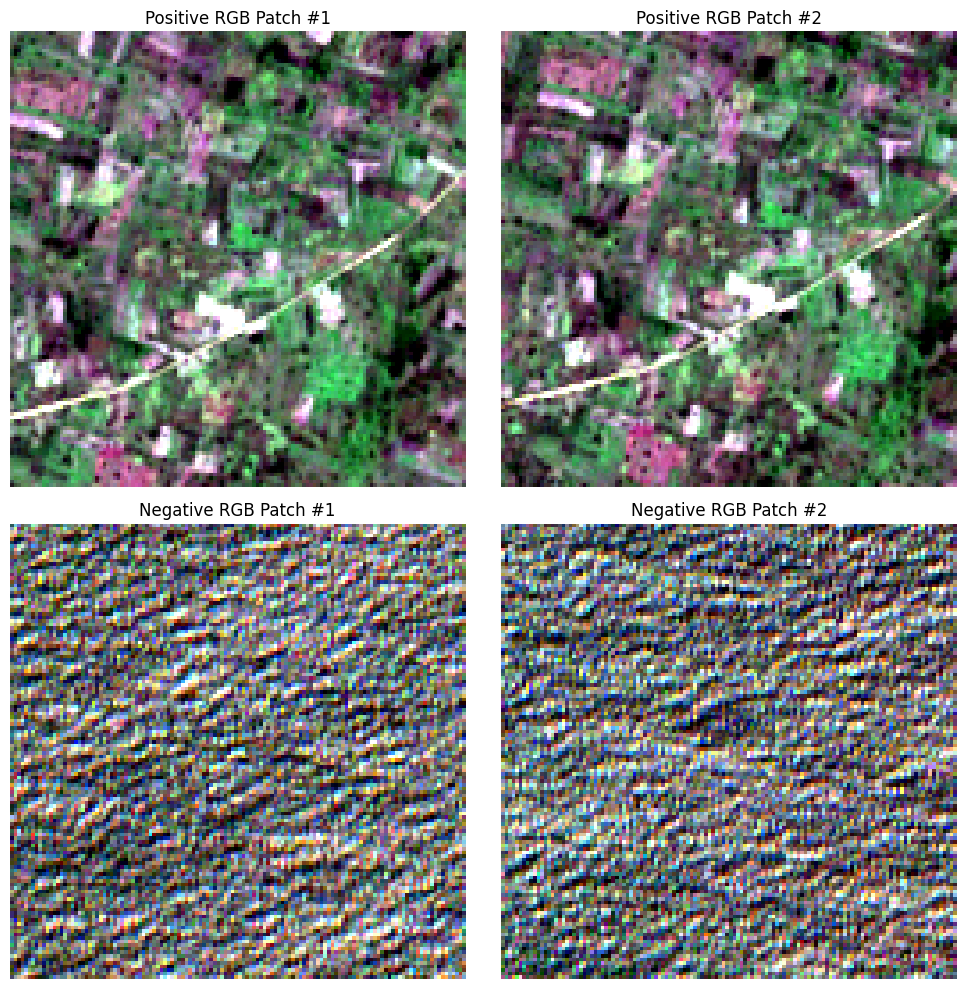

In [ ]:
import rasterio
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import box
from rasterio.windows import Window
from pathlib import Path

# Paths
dataset_path = Path('/root/.fastai/data/refinedfloatingobjects')
scene = 'accra_20181031'
img_path = dataset_path / f'{scene}.tif'
shp_path = dataset_path / f'{scene}_qualitative_poly.shp'

# Load shapefile
gdf = gpd.read_file(shp_path)

# Normalize for display
def normalize(img):
    img_min, img_max = np.percentile(img, (2, 98))
    return np.clip((img - img_min) / (img_max - img_min), 0, 1)

positive_patches = []
negative_patches = []

with rasterio.open(img_path) as src:
    gdf = gdf.to_crs(src.crs)
    transform = src.transform
    height, width = src.height, src.width
    patch_size = 128
    margin = patch_size // 2

    # Collect 2 positive samples
    for poly in gdf.geometry:
        if poly.area < 50:
            continue
        centroid = poly.centroid
        row, col = ~transform * (centroid.x, centroid.y)
        row, col = int(row), int(col)
        if row < margin or col < margin or row >= height - margin or col >= width - margin:
            continue
        window = Window(col - margin, row - margin, patch_size, patch_size)
        rgb = src.read([4, 3, 2], window=window).astype('float32')
        if rgb.shape[1:] != (patch_size, patch_size):
            continue
        rgb_disp = np.stack([normalize(rgb[i]) for i in range(3)], axis=-1)
        positive_patches.append(rgb_disp)
        if len(positive_patches) >= 2:
            break

    # Collect 2 negative samples
    B8A_full = src.read(9).astype('float32')
    ocean_mask = B8A_full < 600
    ocean_indices = np.argwhere(ocean_mask)
    np.random.shuffle(ocean_indices)

    for r, c in ocean_indices:
        if r < margin or c < margin or r >= height - margin or c >= width - margin:
            continue
        x, y = transform * (c, r)
        patch_box = box(x - 640, y - 640, x + 640, y + 640)
        if gdf.intersects(patch_box).any():
            continue
        window = Window(c - margin, r - margin, patch_size, patch_size)
        rgb = src.read([4, 3, 2], window=window).astype('float32')
        if rgb.shape[1:] != (patch_size, patch_size):
            continue
        rgb_disp = np.stack([normalize(rgb[i]) for i in range(3)], axis=-1)
        negative_patches.append(rgb_disp)
        if len(negative_patches) >= 2:
            break

# Plot
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for i in range(2):
    axs[0, i].imshow(positive_patches[i])
    axs[0, i].set_title(f"Positive RGB Patch #{i+1}")
    axs[0, i].axis('off')
    axs[1, i].imshow(negative_patches[i])
    axs[1, i].set_title(f"Negative RGB Patch #{i+1}")
    axs[1, i].axis('off')
plt.tight_layout()
plt.show()


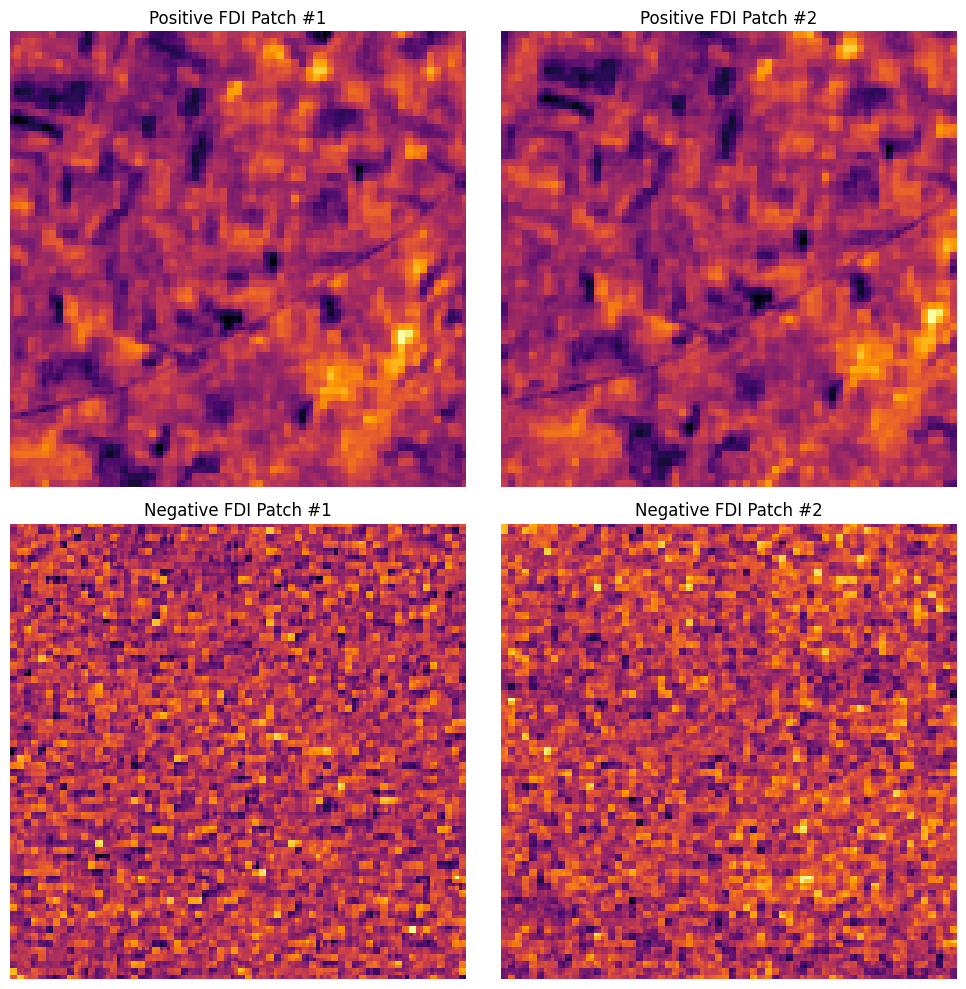

In [ ]:
import rasterio
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import box
from rasterio.windows import Window
from pathlib import Path

# --- Setup ---
dataset_path = Path('/root/.fastai/data/refinedfloatingobjects')
scene = 'accra_20181031'
img_path = dataset_path / f'{scene}.tif'
shp_path = dataset_path / f'{scene}_qualitative_poly.shp'

# --- Load shapefile ---
gdf = gpd.read_file(shp_path)

# --- Define FDI function ---
def compute_fdi(B4, B5, B6, B8A):
    numerator = B8A - B5
    denominator = (B8A - B4) + 1e-6
    correction = (numerator / denominator) * (B4 - B5)
    return B6 - B5 - correction

# --- Containers for patches ---
positive_fdi = []
negative_fdi = []

with rasterio.open(img_path) as src:
    gdf = gdf.to_crs(src.crs)
    transform = src.transform
    height, width = src.height, src.width
    patch_size = 128
    margin = patch_size // 2

    # --- Positive FDI patches ---
    for poly in gdf.geometry:
        if poly.area < 50:
            continue
        centroid = poly.centroid
        row, col = ~transform * (centroid.x, centroid.y)
        row, col = int(row), int(col)
        if row < margin or col < margin or row >= height - margin or col >= width - margin:
            continue
        window = Window(col - margin, row - margin, patch_size, patch_size)
        try:
            B4 = src.read(4, window=window).astype('float32')
            B5 = src.read(5, window=window).astype('float32')
            B6 = src.read(6, window=window).astype('float32')
            B8A = src.read(9, window=window).astype('float32')
            fdi = compute_fdi(B4, B5, B6, B8A)
            if fdi.shape == (patch_size, patch_size):
                positive_fdi.append(fdi)
                if len(positive_fdi) >= 2:
                    break
        except:
            continue

    # --- Negative FDI patches ---
    B8A_full = src.read(9).astype('float32')
    ocean_mask = B8A_full < 600
    ocean_indices = np.argwhere(ocean_mask)
    np.random.shuffle(ocean_indices)

    for r, c in ocean_indices:
        if r < margin or c < margin or r >= height - margin or c >= width - margin:
            continue
        x, y = transform * (c, r)
        patch_box = box(x - 640, y - 640, x + 640, y + 640)
        if gdf.intersects(patch_box).any():
            continue
        window = Window(c - margin, r - margin, patch_size, patch_size)
        try:
            B4 = src.read(4, window=window).astype('float32')
            B5 = src.read(5, window=window).astype('float32')
            B6 = src.read(6, window=window).astype('float32')
            B8A = src.read(9, window=window).astype('float32')
            fdi = compute_fdi(B4, B5, B6, B8A)
            if fdi.shape == (patch_size, patch_size):
                negative_fdi.append(fdi)
                if len(negative_fdi) >= 2:
                    break
        except:
            continue

# --- Plotting ---
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for i in range(2):
    axs[0, i].imshow(positive_fdi[i], cmap='inferno')
    axs[0, i].set_title(f"Positive FDI Patch #{i+1}")
    axs[0, i].axis('off')
    axs[1, i].imshow(negative_fdi[i], cmap='inferno')
    axs[1, i].set_title(f"Negative FDI Patch #{i+1}")
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()


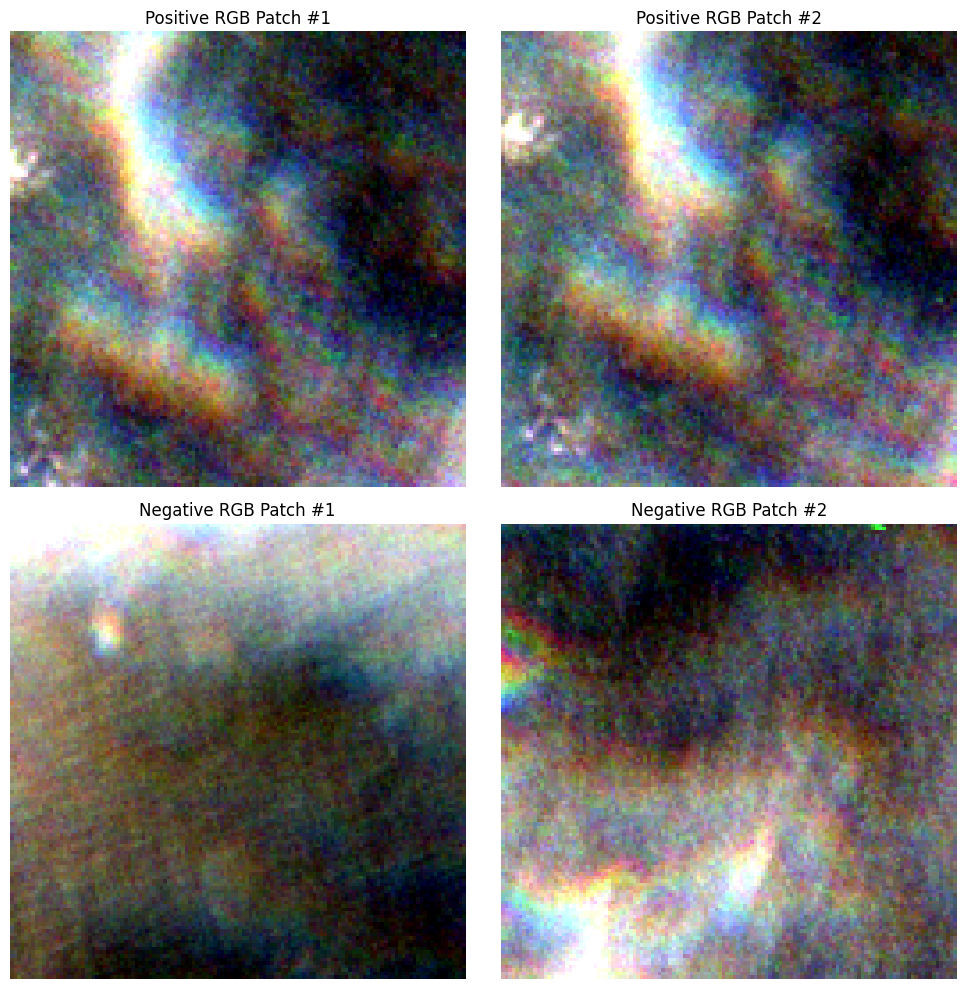

In [ ]:
import rasterio
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import box
from rasterio.windows import Window
from pathlib import Path

# Define paths for the Durban scene
dataset_path = Path('/root/.fastai/data/refinedfloatingobjects')
scene = 'durban_20190424'
img_path = dataset_path / f'{scene}.tif'
shp_path = dataset_path / f'{scene}_qualitative_poly.shp'

# Load the shapefile (debris polygons)
gdf = gpd.read_file(shp_path)

# Function to normalize image for display
def normalize(img):
    img_min, img_max = np.percentile(img, (2, 98))
    return np.clip((img - img_min) / (img_max - img_min), 0, 1)

# Containers for positive and negative RGB patches
positive_patches = []
negative_patches = []

with rasterio.open(img_path) as src:
    # Reproject polygons to the image CRS
    gdf = gdf.to_crs(src.crs)
    transform = src.transform
    height, width = src.height, src.width
    patch_size = 128
    margin = patch_size // 2

    # Collect 2 positive samples using debris polygons
    for poly in gdf.geometry:
        if poly.area < 50:
            continue  # Skip very small polygons
        centroid = poly.centroid
        row, col = ~transform * (centroid.x, centroid.y)
        row, col = int(row), int(col)
        if row < margin or col < margin or row >= height - margin or col >= width - margin:
            continue  # Ensure patch is fully inside the image
        window = Window(col - margin, row - margin, patch_size, patch_size)
        rgb = src.read([4, 3, 2], window=window).astype('float32')
        if rgb.shape[1:] != (patch_size, patch_size):
            continue
        rgb_disp = np.stack([normalize(rgb[i]) for i in range(3)], axis=-1)
        positive_patches.append(rgb_disp)
        if len(positive_patches) >= 2:
            break

    # Collect 2 negative samples from ocean areas
    B8A_full = src.read(9).astype('float32')
    ocean_mask = B8A_full < 600  # Ocean pixels likely have lower B8A values
    ocean_indices = np.argwhere(ocean_mask)
    np.random.shuffle(ocean_indices)

    for r, c in ocean_indices:
        if r < margin or c < margin or r >= height - margin or c >= width - margin:
            continue
        x, y = transform * (c, r)
        patch_box = box(x - 640, y - 640, x + 640, y + 640)
        # Skip if this patch intersects any debris polygon
        if gdf.intersects(patch_box).any():
            continue
        window = Window(c - margin, r - margin, patch_size, patch_size)
        rgb = src.read([4, 3, 2], window=window).astype('float32')
        if rgb.shape[1:] != (patch_size, patch_size):
            continue
        rgb_disp = np.stack([normalize(rgb[i]) for i in range(3)], axis=-1)
        negative_patches.append(rgb_disp)
        if len(negative_patches) >= 2:
            break

# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for i in range(2):
    axs[0, i].imshow(positive_patches[i])
    axs[0, i].set_title(f"Positive RGB Patch #{i+1}")
    axs[0, i].axis('off')

    axs[1, i].imshow(negative_patches[i])
    axs[1, i].set_title(f"Negative RGB Patch #{i+1}")
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()


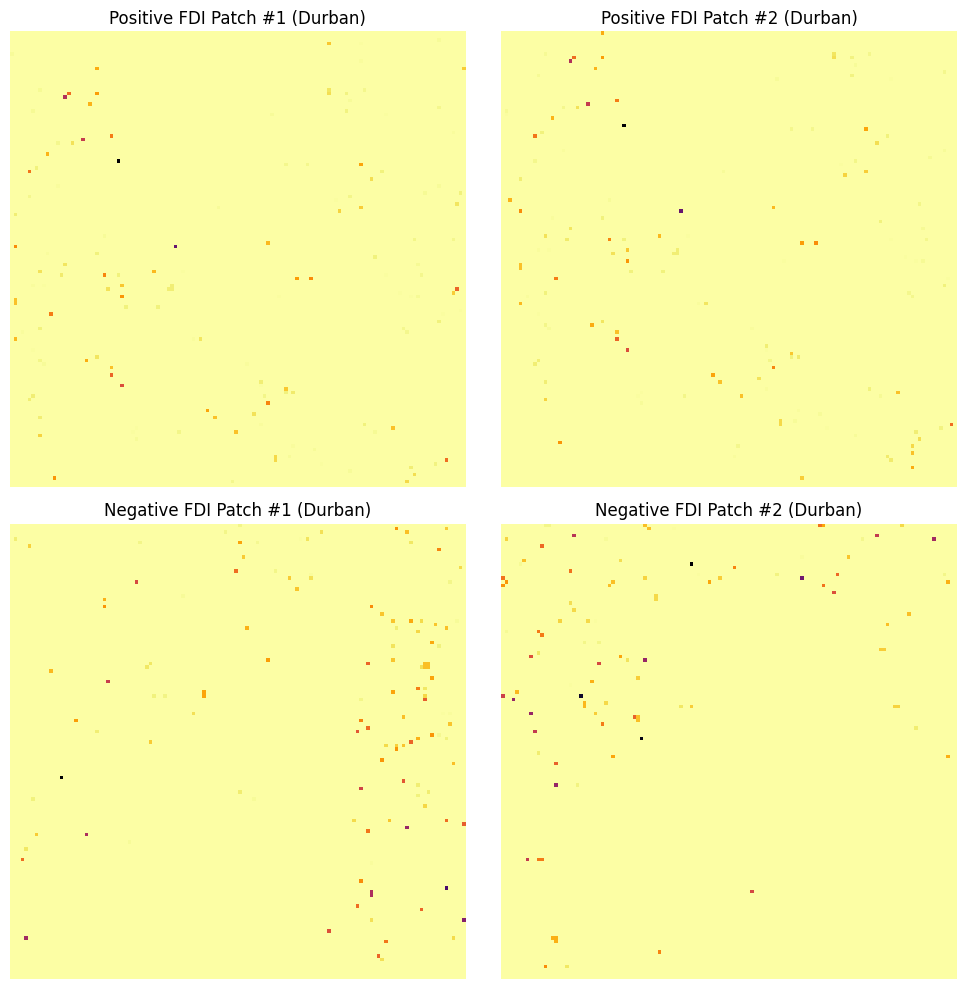

In [ ]:
import rasterio
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import box
from rasterio.windows import Window
from pathlib import Path

# Paths for Durban scene
dataset_path = Path('/root/.fastai/data/refinedfloatingobjects')
scene = 'durban_20190424'
img_path = dataset_path / f'{scene}.tif'
shp_path = dataset_path / f'{scene}_qualitative_poly.shp'

# Load the Durban shapefile (debris polygons)
gdf = gpd.read_file(shp_path)

# Function to compute the Floating Debris Index (FDI)
def compute_fdi(B4, B5, B6, B8A):
    numerator = B8A - B5
    denominator = (B8A - B4) + 1e-6
    correction = (numerator / denominator) * (B4 - B5)
    return B6 - B5 - correction

# Containers for FDI patches
positive_fdi_patches = []
negative_fdi_patches = []

with rasterio.open(img_path) as src:
    # Reproject polygons to match raster CRS
    gdf = gdf.to_crs(src.crs)
    transform = src.transform
    height, width = src.height, src.width
    patch_size = 128
    margin = patch_size // 2

    # --- Collect 2 positive FDI patches (from debris polygon centroids) ---
    for poly in gdf.geometry:
        if poly.area < 50:
            continue  # Skip very small polygons
        centroid = poly.centroid
        row, col = ~transform * (centroid.x, centroid.y)
        row, col = int(row), int(col)
        # Ensure the 128x128 patch is fully within the image bounds
        if row < margin or col < margin or row >= height - margin or col >= width - margin:
            continue
        window = Window(col - margin, row - margin, patch_size, patch_size)
        try:
            B4 = src.read(4, window=window).astype('float32')
            B5 = src.read(5, window=window).astype('float32')
            B6 = src.read(6, window=window).astype('float32')
            B8A = src.read(9, window=window).astype('float32')
        except:
            continue
        fdi = compute_fdi(B4, B5, B6, B8A)
        if fdi.shape == (patch_size, patch_size):
            positive_fdi_patches.append(fdi)
        if len(positive_fdi_patches) >= 2:
            break

    # --- Collect 2 negative FDI patches (from clean ocean areas) ---
    B8A_full = src.read(9).astype('float32')
    ocean_mask = B8A_full < 600  # Threshold to select ocean pixels
    ocean_indices = np.argwhere(ocean_mask)
    np.random.shuffle(ocean_indices)
    neg_count = 0
    for r, c in ocean_indices:
        if r < margin or c < margin or r >= height - margin or c >= width - margin:
            continue
        # Get real-world coordinates of the candidate pixel
        x, y = transform * (c, r)
        patch_box = box(x - 640, y - 640, x + 640, y + 640)
        # Skip if the candidate patch overlaps any debris polygon
        if gdf.intersects(patch_box).any():
            continue
        window = Window(c - margin, r - margin, patch_size, patch_size)
        try:
            B4 = src.read(4, window=window).astype('float32')
            B5 = src.read(5, window=window).astype('float32')
            B6 = src.read(6, window=window).astype('float32')
            B8A = src.read(9, window=window).astype('float32')
        except:
            continue
        fdi = compute_fdi(B4, B5, B6, B8A)
        if fdi.shape == (patch_size, patch_size):
            negative_fdi_patches.append(fdi)
            neg_count += 1
        if neg_count == 2:
            break

# --- Plot the FDI patches ---
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for i in range(2):
    axs[0, i].imshow(positive_fdi_patches[i], cmap='inferno')
    axs[0, i].set_title(f"Positive FDI Patch #{i+1} (Durban)")
    axs[0, i].axis('off')
    axs[1, i].imshow(negative_fdi_patches[i], cmap='inferno')
    axs[1, i].set_title(f"Negative FDI Patch #{i+1} (Durban)")
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import rasterio
import geopandas as gpd
from rasterio.windows import Window, bounds as window_bounds
from pathlib import Path

# Setup paths (using Accra as an example)
dataset_path = Path('/root/.fastai/data/refinedfloatingobjects')
scene = 'accra_20181031'
img_path = dataset_path / f'{scene}.tif'
shp_path = dataset_path / f'{scene}_qualitative_poly.shp'

# Load shapefile
gdf = gpd.read_file(shp_path)

with rasterio.open(img_path) as src:
    # Reproject annotations to match image CRS
    gdf = gdf.to_crs(src.crs)
    transform = src.transform
    height, width = src.height, src.width
    print("Image Transform:", transform)
    print("Image Bounds:", src.bounds)

    # Debug: Loop through the first few annotations and print mapping details
    for i, poly in enumerate(gdf.geometry):
        if poly.area < 50:
            continue
        centroid = poly.centroid
        print(f"\nAnnotation #{i}:")
        print("  Centroid (map coords):", centroid.x, centroid.y)
        row, col = ~transform * (centroid.x, centroid.y)
        row, col = int(row), int(col)
        print("  Centroid (pixel coords):", row, col)

        # Check if patch fits entirely within image bounds
        margin = 128 // 2
        if row < margin or col < margin or row >= height - margin or col >= width - margin:
            print("  Patch would be out-of-bounds.")
            continue

        # Define a 128x128 window centered on the centroid
        window = Window(col - margin, row - margin, 128, 128)
        # Compute the bounds of the patch window
        patch_bounds = window_bounds(window, transform)
        print("  Patch Window (pixel):", (col - margin, row - margin, 128, 128))
        print("  Patch Bounds (map coords):", patch_bounds)
        break


Image Transform: | 10.00, 0.00, 799960.00|
| 0.00,-10.00, 700030.00|
| 0.00, 0.00, 1.00|
Image Bounds: BoundingBox(left=799960.0, bottom=590230.0, right=909780.0, top=700030.0)

Annotation #0:
  Centroid (map coords): 813854.2398795843 613873.7132594697
  Centroid (pixel coords): 1389 8615
  Patch Window (pixel): (8551, 1325, 128, 128)
  Patch Bounds (map coords): (885470.0, 685500.0, 886750.0, 686780.0)


Valid binary mask found using a buffer of 20 meters.


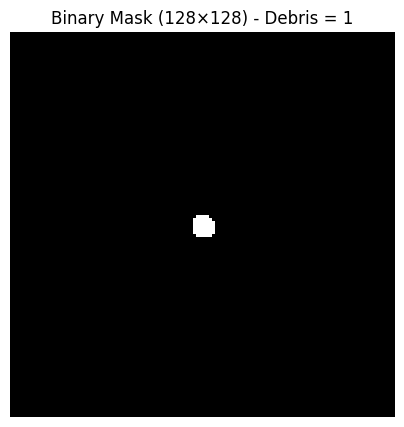

In [ ]:
import rasterio
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from rasterio.windows import Window
from rasterio.features import rasterize
from pathlib import Path

# -----------------------------------------------------------------------------
# Step 1: Setup paths and parameters
# -----------------------------------------------------------------------------
dataset_path = Path('/root/.fastai/data/refinedfloatingobjects')
scene = 'accra_20181031'  # Use Accra scene as example; change to 'durban_20190424' if desired.
img_path = dataset_path / f'{scene}.tif'
shp_path = dataset_path / f'{scene}_qualitative_poly.shp'

patch_size = 128         # Output patch size in pixels
margin = patch_size // 2 # Half patch size for centering (64 pixels)
buffer_distance = 20     # Buffer distance in meters to inflate the geometry

# -----------------------------------------------------------------------------
# Step 2: Load and reproject annotations
# -----------------------------------------------------------------------------
gdf = gpd.read_file(shp_path)

# -----------------------------------------------------------------------------
# Step 3: Open image and extract one positive patch binary mask
# -----------------------------------------------------------------------------
binary_mask = None  # Will hold the final binary mask
used_buffer = None

with rasterio.open(img_path) as src:
    # Reproject annotations to match the image's CRS (e.g., EPSG:32630)
    gdf = gdf.to_crs(src.crs)
    transform = src.transform
    height, width = src.height, src.width

    # Loop through debris annotations
    for poly in gdf.geometry:
        # Skip very small annotations
        if poly.area < 50:
            continue

        # Compute the centroid of the annotation.
        # IMPORTANT: Use (col, row) = ~transform * (x, y)
        col, row = ~transform * (poly.centroid.x, poly.centroid.y)
        col, row = int(col), int(row)

        # Ensure the 128×128 patch is fully inside the image boundaries.
        if row < margin or col < margin or row >= height - margin or col >= width - margin:
            continue

        # Define the window for a 128×128 patch centered on the centroid.
        window = Window(col - margin, row - margin, patch_size, patch_size)

        # Compute the affine transform for this patch.
        patch_transform = rasterio.windows.transform(window, transform)

        # Buffer the polygon by a given distance (to ensure even thin lines produce some positive pixels)
        poly_buffered = poly.buffer(buffer_distance)

        # Rasterize the buffered polygon into a binary mask for the patch.
        # all_touched=True marks all pixels touched by the geometry as 1.
        mask_candidate = rasterize(
            [(poly_buffered, 1)],
            out_shape=(patch_size, patch_size),
            transform=patch_transform,
            fill=0,
            all_touched=True
        )

        # Check if the mask has any positive pixels.
        if mask_candidate.sum() > 0:
            binary_mask = mask_candidate
            used_buffer = buffer_distance
            print(f"Valid binary mask found using a buffer of {used_buffer} meters.")
            break

# -----------------------------------------------------------------------------
# Step 4: Display the binary mask
# -----------------------------------------------------------------------------
if binary_mask is not None:
    plt.figure(figsize=(5,5))
    plt.imshow(binary_mask, cmap='gray')
    plt.title("Binary Mask (128×128) - Debris = 1")
    plt.axis("off")
    plt.show()
else:
    print("No valid patch found with a non-zero mask.")
